In [30]:
#from google.colab import drive
#drive.mount('/content/drive')

In [31]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [32]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [33]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [34]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(f'Shape of train data : {df_train.shape}')
print(f'Shape of test data : {df_test.shape}')

Shape of train data : (934, 81)
Shape of test data : (234, 80)


In [35]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,142,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2006,WD,Normal,260000
1,365,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,190000
2,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
3,976,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,165000
4,1158,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,230000


In [36]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1156,20,RL,90.0,10768,Pave,NaN,IR1,Lvl,AllPub,...,180,0,NaN,NaN,NaN,0,7,2007,WD,Normal
2,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,New,Partial
3,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal
4,471,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,AllPub,...,140,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [37]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,934.000000,934.000000,771.000000,934.000000,934.000000,934.000000,934.000000,934.000000,928.000000,934.000000,...,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000,934.000000
mean,720.086724,57.692719,69.584955,10456.070664,6.139186,5.552463,1972.568522,1985.350107,107.657328,457.522484,...,99.177730,48.443255,21.120985,3.701285,13.375803,1.932548,53.276231,6.332976,2007.814775,182981.457173
std,425.245539,43.581647,22.718869,10533.263205,1.385852,1.119318,30.060124,20.480156,184.543020,444.230598,...,124.777609,68.426148,60.321125,32.129822,52.363548,34.512758,606.248612,2.711067,1.334253,80613.726628
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,353.250000,20.000000,59.000000,7500.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132000.000000
50%,705.500000,50.000000,70.000000,9552.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,403.000000,...,29.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165075.000000
75%,1101.500000,70.000000,80.000000,11644.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,735.000000,...,172.750000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1459.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             934 non-null    int64  
 1   MSSubClass     934 non-null    int64  
 2   MSZoning       934 non-null    object 
 3   LotFrontage    771 non-null    float64
 4   LotArea        934 non-null    int64  
 5   Street         934 non-null    object 
 6   Alley          56 non-null     object 
 7   LotShape       934 non-null    object 
 8   LandContour    934 non-null    object 
 9   Utilities      934 non-null    object 
 10  LotConfig      934 non-null    object 
 11  LandSlope      934 non-null    object 
 12  Neighborhood   934 non-null    object 
 13  Condition1     934 non-null    object 
 14  Condition2     934 non-null    object 
 15  BldgType       934 non-null    object 
 16  HouseStyle     934 non-null    object 
 17  OverallQual    934 non-null    int64  
 18  OverallCon

In [39]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,234.000000,234.000000,195.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.00000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,759.782051,56.111111,71.030769,10821.769231,5.944444,5.666667,1969.534188,1986.081197,90.102564,416.170940,...,456.735043,96.128205,45.67094,20.290598,5.782051,15.619658,4.512821,30.341880,6.235043,2007.816239
std,424.277360,43.355062,33.047593,11522.432087,1.411598,1.119473,30.268486,20.416212,160.431841,536.324925,...,227.767308,136.144019,66.33145,58.763666,33.339835,54.861634,48.911344,189.584735,2.635245,1.347543
min,12.000000,20.000000,21.000000,1491.000000,2.000000,2.000000,1893.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,378.500000,20.000000,59.000000,7514.500000,5.000000,5.000000,1951.250000,1969.000000,0.000000,0.000000,...,308.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.250000,2007.000000
50%,780.000000,50.000000,65.000000,9338.500000,6.000000,5.000000,1970.500000,1994.500000,0.000000,333.000000,...,461.000000,0.000000,24.50000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1140.250000,60.000000,80.000000,11357.750000,7.000000,6.000000,1998.750000,2004.750000,136.500000,670.250000,...,576.000000,168.000000,67.50000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,159000.000000,10.000000,9.000000,2009.000000,2009.000000,796.000000,5644.000000,...,1418.000000,736.000000,502.00000,294.000000,290.000000,396.000000,576.000000,2000.000000,12.000000,2010.000000


In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             234 non-null    int64  
 1   MSSubClass     234 non-null    int64  
 2   MSZoning       234 non-null    object 
 3   LotFrontage    195 non-null    float64
 4   LotArea        234 non-null    int64  
 5   Street         234 non-null    object 
 6   Alley          15 non-null     object 
 7   LotShape       234 non-null    object 
 8   LandContour    234 non-null    object 
 9   Utilities      234 non-null    object 
 10  LotConfig      234 non-null    object 
 11  LandSlope      234 non-null    object 
 12  Neighborhood   234 non-null    object 
 13  Condition1     234 non-null    object 
 14  Condition2     234 non-null    object 
 15  BldgType       234 non-null    object 
 16  HouseStyle     234 non-null    object 
 17  OverallQual    234 non-null    int64  
 18  OverallCon

In [41]:
df_train.drop("Id", axis = 1, inplace = True)
y = df_train.SalePrice  #target
df_train.drop("SalePrice", axis = 1, inplace = True)

test_ID = df_test['Id'] # We need id of test data for submission
df_test.drop("Id", axis = 1, inplace = True)

In [42]:
df_train.columns[df_train.isna().any()].tolist() #list of columns that have null values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [43]:
data = pd.concat((df_train, df_test)).reset_index(drop=True)
#data.drop(['SalePrice'], axis=1, inplace=True)

In [44]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,78.0,11645,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,1,2006,WD,Normal
1,60,RL,NaN,18800,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,New,Partial
3,160,FV,NaN,2651,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
4,120,RL,34.0,5001,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20,RL,93.0,9382,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
1164,50,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdWo,NaN,0,7,2007,WD,Normal
1165,60,RL,69.0,9337,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
1166,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal


In [45]:
col_to_encoding = []
for i in data:
    if data[i].dtype == 'object':
        col_to_encoding.append(i)
        print(i,':',df_train[i].unique())
        print()

MSZoning : ['RL' 'FV' 'RM' 'RH' 'C (all)']

Street : ['Pave' 'Grvl']

Alley : [nan 'Pave' 'Grvl']

LotShape : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']

Utilities : ['AllPub']

LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope : ['Gtl' 'Sev' 'Mod']

Neighborhood : ['CollgCr' 'NWAmes' 'NridgHt' 'Somerst' 'Sawyer' 'Crawfor' 'BrDale'
 'Edwards' 'Mitchel' 'NAmes' 'IDOTRR' 'Veenker' 'Timber' 'NoRidge'
 'SawyerW' 'ClearCr' 'Gilbert' 'BrkSide' 'StoneBr' 'OldTown' 'NPkVill'
 'Blmngtn' 'SWISU' 'MeadowV' 'Blueste']

Condition1 : ['Norm' 'Feedr' 'RRNe' 'PosN' 'Artery' 'PosA' 'RRAn' 'RRAe' 'RRNn']

Condition2 : ['Norm' 'PosN' 'Artery' 'Feedr' 'RRNn' 'RRAe']

BldgType : ['1Fam' 'Twnhs' 'TwnhsE' 'Duplex' '2fmCon']

HouseStyle : ['1Story' '2Story' 'SLvl' 'SFoyer' '1.5Fin' '1.5Unf' '2.5Unf' '2.5Fin']

RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']

RoofMatl : ['CompShg' 'Tar&Grv' 'Membran' 'Metal' 'WdShngl' 'WdShake']

Exterior1st : ['VinylSd' 'Hd

In [46]:
df_train['LotFrontage'].fillna((df_train['LotFrontage'].median()), inplace=True) # fill with mean
df_test['LotFrontage'].fillna((df_test['LotFrontage'].median()), inplace=True) # fill with mean

df_train['Alley'].fillna('NA', inplace=True) # replace with no alley
df_test['Alley'].fillna('NA', inplace=True) # replace with no alley

#Mohammed ------------------------------------------------------------------------
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])

df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])


df_train['BsmtQual'].fillna('NA', inplace=True)
df_test['BsmtQual'].fillna('NA', inplace=True)

df_train['BsmtCond'].fillna('NA', inplace=True)
df_test['BsmtCond'].fillna('NA', inplace=True)

df_train['BsmtExposure'].fillna('NA', inplace=True)
df_test['BsmtExposure'].fillna('NA', inplace=True)

df_train['BsmtFinType1'].fillna('NA', inplace=True)
df_test['BsmtFinType1'].fillna('NA', inplace=True)

df_train['BsmtFinType2'].fillna('NA', inplace=True)
df_test['BsmtFinType2'].fillna('NA', inplace=True)

#Seba -----------------------------------------------------------------------------
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_test['Electrical'] = df_test['Electrical'].fillna(df_train['Electrical'].mode()[0])

df_train['FireplaceQu'].fillna('NF',inplace=True)
df_test['FireplaceQu'].fillna('NF',inplace=True)

df_train['GarageType'].fillna('NA',inplace=True)
df_test['GarageType'].fillna('NA',inplace=True)

df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].median(),inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].median(),inplace=True)

df_train['GarageFinish'].fillna('NA',inplace=True)
df_test['GarageFinish'].fillna('NA',inplace=True)

#Maram ---------------------------------------------------------------------
df_train['GarageQual'] = df_train['GarageQual'].replace([np.nan], 'NA')
df_test['GarageQual'] = df_test['GarageQual'].replace([np.nan], 'NA')

df_train['GarageCond'] = df_train['GarageCond'].replace([np.nan], 'NA')
df_test['GarageCond'] = df_test['GarageCond'].replace([np.nan], 'NA')

df_train['PoolQC'] = df_train['PoolQC'].replace(['NaN'], 'NA')
df_test['PoolQC'] = df_test['PoolQC'].replace(['NaN'], 'NA')
df_train['PoolQC'] = df_train['PoolQC'].replace([np.nan], 'NA')
df_test['PoolQC'] = df_test['PoolQC'].replace([np.nan], 'NA')

df_train['Fence'] = df_train['Fence'].replace(['NaN'], 'NA')
df_test['Fence'] = df_test['Fence'].replace(['NaN'], 'NA')
df_train['Fence'] = df_train['Fence'].replace([np.nan], 'NA')
df_test['Fence'] = df_test['Fence'].replace([np.nan], 'NA')

df_train['MiscFeature'] = df_train['MiscFeature'].replace(['NaN'], 'NA')
df_test['MiscFeature'] = df_test['MiscFeature'].replace(['NaN'], 'NA')
df_train['MiscFeature'] = df_train['MiscFeature'].replace([np.nan], 'NA')
df_test['MiscFeature'] = df_test['MiscFeature'].replace([np.nan], 'NA')

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     934 non-null    int64  
 1   MSZoning       934 non-null    object 
 2   LotFrontage    934 non-null    float64
 3   LotArea        934 non-null    int64  
 4   Street         934 non-null    object 
 5   Alley          934 non-null    object 
 6   LotShape       934 non-null    object 
 7   LandContour    934 non-null    object 
 8   Utilities      934 non-null    object 
 9   LotConfig      934 non-null    object 
 10  LandSlope      934 non-null    object 
 11  Neighborhood   934 non-null    object 
 12  Condition1     934 non-null    object 
 13  Condition2     934 non-null    object 
 14  BldgType       934 non-null    object 
 15  HouseStyle     934 non-null    object 
 16  OverallQual    934 non-null    int64  
 17  OverallCond    934 non-null    int64  
 18  YearBuilt 

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     234 non-null    int64  
 1   MSZoning       234 non-null    object 
 2   LotFrontage    234 non-null    float64
 3   LotArea        234 non-null    int64  
 4   Street         234 non-null    object 
 5   Alley          234 non-null    object 
 6   LotShape       234 non-null    object 
 7   LandContour    234 non-null    object 
 8   Utilities      234 non-null    object 
 9   LotConfig      234 non-null    object 
 10  LandSlope      234 non-null    object 
 11  Neighborhood   234 non-null    object 
 12  Condition1     234 non-null    object 
 13  Condition2     234 non-null    object 
 14  BldgType       234 non-null    object 
 15  HouseStyle     234 non-null    object 
 16  OverallQual    234 non-null    int64  
 17  OverallCond    234 non-null    int64  
 18  YearBuilt 

C:\Users\User\AppData\Local\Temp\ipykernel_2016\3147075525.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


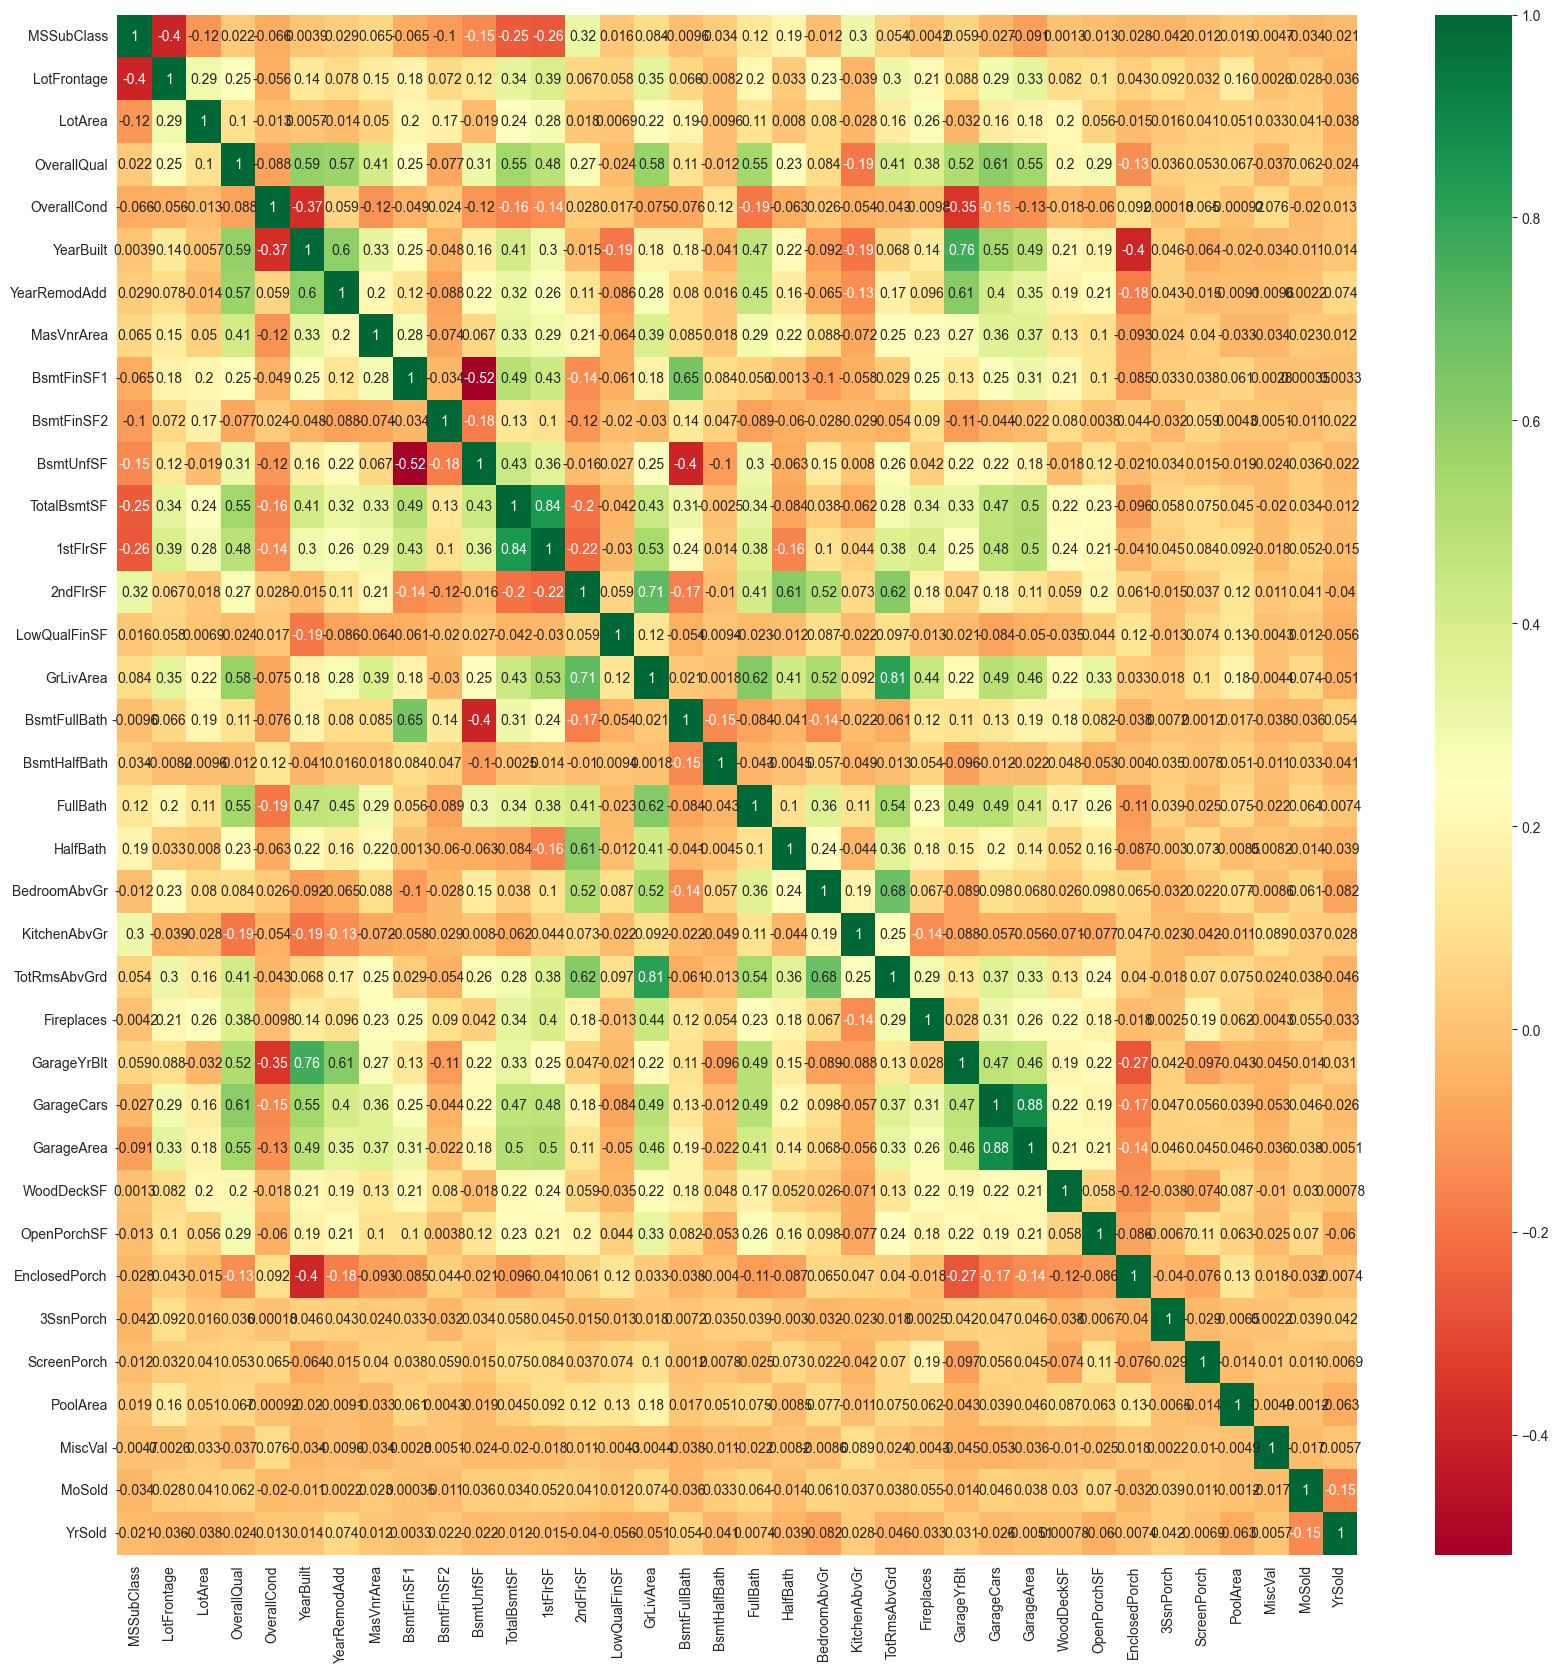

In [49]:
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [50]:
col_to_encoding = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
                   'ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
                   'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
                   'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'Utilities']
data = pd.concat((df_train, df_test)).reset_index(drop=True)

le = LabelEncoder()
for col in col_to_encoding:
    encoded_labels = le.fit_transform(data[col])
    data[col] = encoded_labels
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,RL,78.0,11645,1,1,3,Lvl,0,Inside,...,0,0,2,4,NA,0,1,2006,WD,Normal
1,5,RL,70.0,18800,1,1,0,Lvl,0,FR2,...,0,0,2,4,NA,0,7,2006,WD,Normal
2,5,RL,104.0,13518,1,1,3,Lvl,0,Inside,...,0,0,2,4,NA,0,7,2009,New,Partial
3,12,FV,70.0,2651,1,1,3,Lvl,0,FR2,...,0,0,2,4,NA,0,4,2006,WD,Normal
4,11,RL,34.0,5001,1,1,0,Lvl,0,Inside,...,0,0,2,4,NA,0,7,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,RL,93.0,9382,1,1,0,Lvl,0,CulDSac,...,0,0,2,4,NA,0,7,2008,WD,Normal
1164,4,RM,60.0,9600,1,0,3,Lvl,0,Inside,...,0,0,2,1,NA,0,7,2007,WD,Normal
1165,5,RL,69.0,9337,1,1,0,Lvl,0,Inside,...,0,0,2,4,NA,0,5,2007,WD,Normal
1166,8,RL,76.0,9880,1,1,3,Lvl,0,Inside,...,0,576,1,0,NA,0,7,2008,WD,Normal


In [51]:
columns=["MSZoning","LandContour","LotConfig","Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle"
,"RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","Electrical","GarageType","MiscFeature","SaleType","SaleCondition"]
ohe = OneHotEncoder()

In [52]:
for col in columns:
    column_data = data[col].values.reshape(-1,1)
    encoded_column_data = ohe.fit_transform(column_data)
    column_name = [col + '_' + category for category in ohe.categories_[0]]
    encoded_df = pd.DataFrame(encoded_column_data.toarray(),columns=column_name)
    data = pd.concat([data,encoded_df],axis=1)
    data = data.drop(col,axis=1)
data

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,78.0,11645,1,1,3,0,0,7,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5,70.0,18800,1,1,0,0,0,6,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,104.0,13518,1,1,3,0,0,9,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12,70.0,2651,1,1,3,0,0,7,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11,34.0,5001,1,1,0,0,0,7,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0,93.0,9382,1,1,0,0,0,7,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1164,4,60.0,9600,1,0,3,0,0,5,7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1165,5,69.0,9337,1,1,0,0,0,6,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1166,8,76.0,9880,1,1,3,0,0,6,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
normlalize = Normalizer()
data_scale = normlalize.fit_transform(data)
data_scale

array([[0.00000000e+00, 6.10836378e-03, 9.11947388e-01, ...,
        0.00000000e+00, 7.83123562e-05, 0.00000000e+00],
       [2.58375445e-04, 3.61725622e-03, 9.71491672e-01, ...,
        0.00000000e+00, 5.16750889e-05, 0.00000000e+00],
       [3.34938296e-04, 6.96671656e-03, 9.05539177e-01, ...,
        0.00000000e+00, 0.00000000e+00, 6.69876592e-05],
       ...,
       [4.77631493e-04, 6.59131460e-03, 8.91929049e-01, ...,
        0.00000000e+00, 9.55262985e-05, 0.00000000e+00],
       [7.35890905e-04, 6.99096360e-03, 9.08825268e-01, ...,
        0.00000000e+00, 9.19863632e-05, 0.00000000e+00],
       [1.55638439e-03, 5.80106909e-03, 6.96552759e-01, ...,
        0.00000000e+00, 1.41489490e-04, 0.00000000e+00]])

In [54]:
pca = PCA(n_components=50)
data_pca = pca.fit_transform(data)
data_pca

array([[ 1.14040650e+03,  8.23565248e+02,  9.49438670e+02, ...,
         2.14972403e-01, -4.94490101e-01, -8.85533235e-02],
       [ 8.26621876e+03, -3.79084562e+02, -2.46990840e+02, ...,
         3.51328614e-01, -4.88137676e-02, -3.85346835e-02],
       [ 3.02655336e+03,  2.23358044e+03, -1.19999838e+03, ...,
        -1.08424430e+00,  3.70664819e-01, -3.99218575e-01],
       ...,
       [-1.19078619e+03,  3.77669565e+01, -3.52194408e+02, ...,
         1.48132154e-01, -2.09220827e-01, -7.30029871e-02],
       [-6.54579124e+02, -2.88669878e+02,  3.97794183e+02, ...,
        -3.72094989e-01, -5.34671748e-01,  1.53893671e-01],
       [-5.58635043e+03,  7.20805300e+02,  8.80862329e+02, ...,
         3.93723407e-01, -1.28266614e+00, -2.16506676e-01]])

In [55]:
X_reduced = data_scale[:df_train.shape[0]]

In [56]:
test_reduced = data_scale[df_train.shape[0]:] #for submission only

In [57]:
X_PCA = data_pca[:df_train.shape[0]]

In [58]:
Test_PCA = data_pca[df_train.shape[0]:] #for submission only

In [59]:
len(X_PCA)

934

In [60]:
#normlalize = Normalizer()
#data_scale = normlalize.fit_transform(X_reduced)
#data_scale.shape

In [61]:
X_train ,X_val,y_train ,y_val = train_test_split(X_PCA , y,test_size=0.2,random_state=123)

In [62]:
X_val.shape

(187, 50)

In [63]:
y_val.shape

(187,)

In [64]:
X_train.shape

(747, 50)

In [65]:
y_train.shape

(747,)

In [66]:
xgbr = XGBRegressor(learning_rate=0.01,
                    n_estimators=8000,
                    max_depth=4,
                    min_child_weight=0,
                    gamma=0.6,
                    subsample=0.7,
                    colsample_bytree=0.7,
                    nthread=-1,
                    scale_pos_weight=1,
                    seed=27,
                    reg_alpha=0.00006,
                    random_state=42)
xgbr.fit(X_train, y_train)

pred = xgbr.predict(X_val)

In [67]:
print("RMSE Score:")
print(np.sqrt(mean_squared_error(y_val, pred)))
"""


"""

RMSE Score:
25081.619003138603
